In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/adamsky777/Consultancy_KatapultVC/main/Geography_VCRounds/Company_VCRounds_Geography_BusinessStatus_Industry_Active_Investors.csv")

In [3]:
df

,CompanyName,ActiveInvestors,VCRound,BusinessStatus,PrimaryIndustrySector,HQGlobalRegion
0,RAPIDA,3.0,1st Round,Generating Revenue,Information Technology,Middle East
1,Xamun,NaN,1st Round,Generating Revenue,Information Technology,Asia
2,Only Once,NaN,2nd Round,Product Development,Information Technology,Europe
3,Only Once,NaN,1st Round,Product Development,Information Technology,Europe
4,BenefitBay,9.0,1st Round,Generating Revenue,Financial Services,Americas
...,...,...,...,...,...,...
57082,Redivivus ( Commercial Services),1.0,1st Round,Generating Revenue,Business Products and Services (B2B),Americas
57083,River 3 Renal,NaN,1st Round,Out of Business,Healthcare,Americas
57084,Canvas (Business/Productivity Software),48.0,2nd Round,Generating Revenue,Information Technology,Americas
57085,Canvas (Business/Productivity Software),48.0,1st Round,Generating Revenue,Information Technology,Americas


In [4]:
round_counts = df.groupby(['VCRound', 'PrimaryIndustrySector']).size().reset_index(name='Count')
round_counts

,VCRound,PrimaryIndustrySector,Count
0,1st Round,Business Products and Services (B2B),5384
1,1st Round,Consumer Products and Services (B2C),6301
2,1st Round,Energy,545
3,1st Round,Financial Services,1889
4,1st Round,Healthcare,5129
5,1st Round,Information Technology,17519
6,1st Round,Materials and Resources,716
7,2nd Round,Business Products and Services (B2B),1422
8,2nd Round,Consumer Products and Services (B2C),1746
9,2nd Round,Energy,168


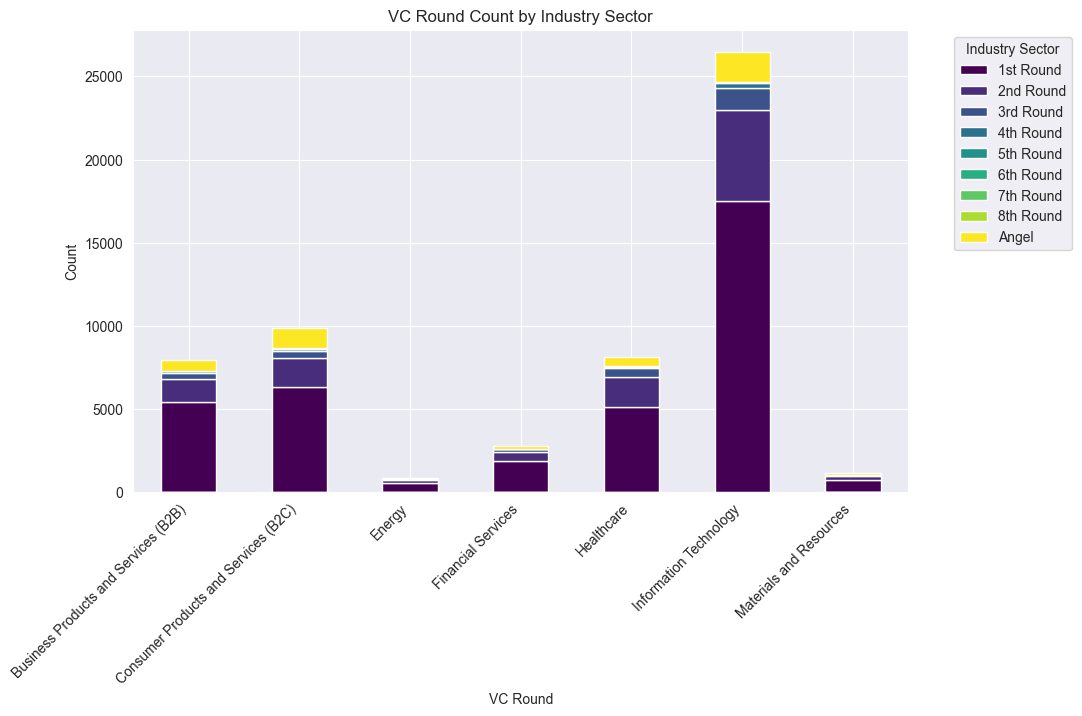

In [12]:
# Pivot the DataFrame for better visualization
round_counts.sort_values(by='Count', inplace=True, ascending=False)
pivot_df = round_counts.pivot(index='PrimaryIndustrySector', columns='VCRound', values='Count').fillna(0)

# Create a grouped bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')


plt.title('VC Round Count by Industry Sector')
plt.xlabel('VC Round')
plt.ylabel('Count')
plt.legend(title='Industry Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.show()